In [1]:
import scirpy as ir

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import scanpy as sc

In [3]:
from glob import glob
import warnings
import tarfile

import anndata
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc

In [4]:
import muon as mu

In [5]:
import numpy as np

In [6]:
samples = {
    "10mix1": {"group": "10mix"},
    "10mix2": {"group": "10mix"},
    "11mix1": {"group": "11mix"},
    "11mix2": {"group": "11mix"},
    "GF1": {"group": "GF"},
    "GF2": {"group": "GF"},

}    
    
# Create a list of AnnData objects (one for each sample)
adatas_tcr = {}
adatas_gex = {}
for sample, sample_meta in samples.items():
    #adata_gex = sc.read_10x_h5(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/count/sample_filtered_feature_bc_matrix.h5")
    adata_tcr = ir.io.read_10x_vdj(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2019-10-29_sorted_cd8/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/vdj_t/filtered_contig_annotations.csv")
    # concatenation only works with unique gene names
    #adata_gex.var_names_make_unique()
    adatas_tcr[sample] = adata_tcr
    #adatas_gex[sample] = adata_gex

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/anndata/utils.py:334: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)


In [7]:
samples = {
    "10mix-ICI1": {"group": "10mix", "condition":"ICI"},
    "10mix-ICI2": {"group": "10mix","condition":"ICI"},
    "11mix-ICI1": {"group": "11mix","condition":"ICI"},
    "11mix-ICI2": {"group": "11mix","condition":"ICI"},
    "GF-ICI1": {"group": "GF","condition":"No ICI"},
    "GF-ICI2": {"group": "GF","condition":"No ICI"},
    "GF-ICI1-plus": {"group": "GF-plus","condition":"ICI"},
    "GF-ICI2-plus": {"group": "GF-plus","condition":"ICI"},


}    
    
# Create a list of AnnData objects (one for each sample)
adatas_tcr_2021 = {}
#adatas_gex_2021 = {}
for sample, sample_meta in samples.items():
    #adata_gex_2021 = sc.read_10x_h5(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/count/sample_filtered_feature_bc_matrix.h5")
    adata_tcr_2021 = ir.io.read_10x_vdj(f"/data/projects/2021/MicrobialMetabolites/single-cell-sorted-cd8/2021-02-01_sorted_cd8_til/analyses_icbi/{sample}/outs/per_sample_outs/{sample}/vdj_t/filtered_contig_annotations.csv")
    # concatenation only works with unique gene names
    #adata_gex_2021.var_names_make_unique()
    adatas_tcr_2021[sample] = adata_tcr_2021
    #adatas_gex_2021[sample] = adata_gex_2021

In [8]:
samples = {
    "10mix-ICI1": {"group": "10mix", "condition":"ICI"},
    "10mix-ICI2": {"group": "10mix","condition":"ICI"},
    "11mix-ICI1": {"group": "11mix","condition":"ICI"},
    "11mix-ICI2": {"group": "11mix","condition":"ICI"},
    "GF-ICI1": {"group": "GF","condition":"No ICI"},
    "GF-ICI2": {"group": "GF","condition":"No ICI"},
    "GF-ICI1-plus": {"group": "GF-plus","condition":"ICI"},
    "GF-ICI2-plus": {"group": "GF-plus","condition":"ICI"},
    "10mix1": {"group": "10mix", "condition":"naive"},
    "10mix2": {"group": "10mix", "condition":"naive"},
    "11mix1": {"group": "11mix", "condition":"naive"},
    "11mix2": {"group": "11xmix", "condition":"naive"},
    "GF1": {"group": "GF", "condition":"naive"},
    "GF2": {"group": "GF", "condition":"naive"},
}    

## Load GEX

In [9]:
adata = sc.read_h5ad("adata_solo_annotated_all.h5ad")

In [10]:
adata_colon = adata[adata.obs["origin"]=="colon"]

In [ ]:
adata_colon.obs.cell_type.replace("COLON_Infg","COLON_Exhausted", inplace=True)

In [12]:
adata_til = adata[adata.obs["origin"]=="til"]

In [ ]:
adata_til.obs.cell_type.replace('MPEC_Effector','MPEC_Exhausted', inplace=True)
adata_til.obs.cell_type.replace('MPEC_Progenitor','MPEC_Naive', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Effector','SLEC_Intermediate', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Inf','SLEC_Intermediate', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Plastic','SLEC_Intermediate', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Terminal','SLEC_Exhausted', inplace=True)
adata_til.obs.cell_type.replace('SLEC_Progenitor','SLEC_Naive', inplace=True)

In [14]:
# Merge anndata objects
adata_tcr = anndata.concat(adatas_tcr, index_unique="_")

In [15]:
# Merge anndata objects
adata_tcr_2021 = anndata.concat(adatas_tcr_2021, index_unique="_")

In [ ]:
adata_colon.obs["sample"] = adata_colon.obs_names.to_series().str.split("_", expand=True)[1]

In [17]:
adata_til.obs["sample"] = adata_til.obs_names.to_series().str.split("_", expand=True)[1]

/tmp/ipykernel_2005096/2114681352.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_til.obs["sample"] = adata_til.obs_names.to_series().str.split("_", expand=True)[1]


In [18]:
adata_tcr.obs["sample"] = adata_tcr.obs_names.to_series().str.split("_", expand=True)[1]

In [19]:
adata_tcr.obs["group"] = adata_tcr.obs["sample"].map(lambda x: samples[x]["group"])
adata_tcr.obs["condition"] = adata_tcr.obs["sample"].map(lambda x: samples[x]["condition"])

In [20]:
adata_tcr.obs

,sample,group,condition
cell_id,,,
AAACCTGAGTCTTGCA-1_10mix1,10mix1,10mix,naive
AAACCTGAGTTAAGTG-1_10mix1,10mix1,10mix,naive
AAACCTGCAGGATCGA-1_10mix1,10mix1,10mix,naive
AAACCTGCATACCATG-1_10mix1,10mix1,10mix,naive
AAACCTGCATTGAGCT-1_10mix1,10mix1,10mix,naive
...,...,...,...
TTTGCGCTCGGTGTTA-1_GF2,GF2,GF,naive
TTTGTCAAGGCTAGCA-1_GF2,GF2,GF,naive
TTTGTCAAGTGCCAGA-1_GF2,GF2,GF,naive


In [21]:
adata_tcr_2021.obs["sample"] = adata_tcr_2021.obs_names.to_series().str.split("_", expand=True)[1]

In [22]:
# Set global met'adata on `mdata.obs`
adata_tcr_2021.obs["sample"] = adata_tcr_2021.obs_names.to_series().str.split("_", expand=True)[1]
adata_tcr_2021.obs["group"] = adata_tcr_2021.obs["sample"].map(lambda x: samples[x]["group"])
adata_tcr_2021.obs["condition"] = adata_tcr_2021.obs["sample"].map(lambda x: samples[x]["condition"])

In [43]:
adata_tcr_2021.obs

,sample,group,condition
cell_id,,,
AAACCTGAGAGCCTAG-1_10mix-ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGCTCTTA-1_10mix-ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGGCACTA-1_10mix-ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGGCTTGA-1_10mix-ICI1,10mix-ICI1,10mix,ICI
AAACCTGAGGTTACCT-1_10mix-ICI1,10mix-ICI1,10mix,ICI
...,...,...,...
TTTGTCATCCAGAGGA-1_GF-ICI2-plus,GF-ICI2-plus,GF-plus,ICI
TTTGTCATCCCTTGCA-1_GF-ICI2-plus,GF-ICI2-plus,GF-plus,ICI
TTTGTCATCTAACTGG-1_GF-ICI2-plus,GF-ICI2-plus,GF-plus,ICI


In [24]:
adata_tcr_merge = anndata.concat([adata_tcr,adata_tcr_2021], index_unique="_")

In [27]:
adata_gex_merge = anndata.concat([adata_colon,adata_til], index_unique="_")

In [59]:
adata_gex_merge.obs.sample_id.value_counts()

sample_id
10mix_ICI2      8133
10mix_ICI1      7153
GF_ICI2_plus    6855
11mix_ICI2      6768
11mix_ICI1      6496
GF_ICI1_plus    4754
GF_ICI1         4743
GF_ICI2         4408
11mix2          3196
11mix1          2266
10mix1          2206
10mix2          1618
GF1             1520
GF2              343
Name: count, dtype: int64

In [97]:
mdata["airr"].obs["origin"]

cell_id
AAACCTGAGTCTTGCA-1_10mix1_0          til
AAACCTGAGTTAAGTG-1_10mix1_0          til
AAACCTGCAGGATCGA-1_10mix1_0          til
AAACCTGCATACCATG-1_10mix1_0          til
AAACCTGCATTGAGCT-1_10mix1_0          til
                                    ... 
TTTGTCATCCAGAGGA-1_GF-ICI2-plus_1    til
TTTGTCATCCCTTGCA-1_GF-ICI2-plus_1    til
TTTGTCATCTAACTGG-1_GF-ICI2-plus_1    til
TTTGTCATCTCTGTCG-1_GF-ICI2-plus_1    til
TTTGTCATCTGTTGAG-1_GF-ICI2-plus_1    til
Name: origin, Length: 71512, dtype: category
Categories (1, object): ['til']

In [29]:
mdata = mu.MuData({"gex": adata_gex_merge, "airr": adata_tcr_merge})

In [103]:
mdata_til = mu.MuData({"gex": adata_til, "airr": adata_tcr_2021})

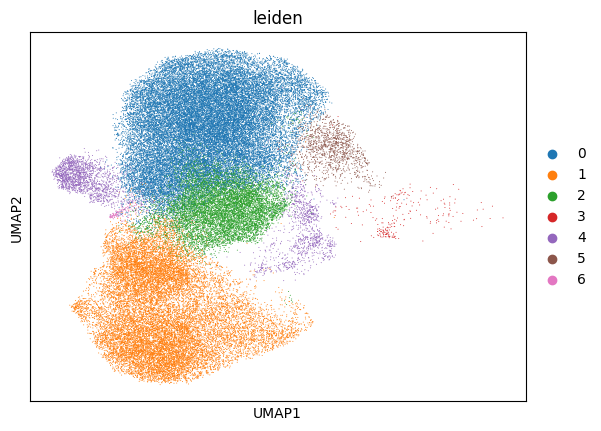

In [30]:
sc.pl.umap(mdata["gex"], color = "leiden")

In [31]:
sc.pp.log1p(mdata["gex"])
sc.pp.pca(mdata["gex"], svd_solver="arpack")
sc.pp.neighbors(mdata["gex"])
sc.tl.umap(mdata["gex"])

In [32]:
ir.pp.index_chains(mdata)
ir.tl.chain_qc(mdata)

In [68]:
# Define the conditions
colon_samples = ["10mix1", "10mix2", "11mix1", "11mix2", "GF1", "GF2"]

# Use np.where() to create the 'origin' column based on conditions
mdata["airr"].obs["origin"] = mdata["airr"].obs.index.to_series().apply(
    lambda x: "colon" if x in colon_samples else "til"
)

In [102]:
mdata["airr"].obs

,sample,group,condition,receptor_type,receptor_subtype,chain_pairing,origin
cell_id,,,,,,,
AAACCTGAGTCTTGCA-1_10mix1_0,10mix1,10mix,naive,TCR,TRA+TRB,single pair,til
AAACCTGAGTTAAGTG-1_10mix1_0,10mix1,10mix,naive,TCR,TRA+TRB,orphan VDJ,til
AAACCTGCAGGATCGA-1_10mix1_0,10mix1,10mix,naive,TCR,TRA+TRB,single pair,til
AAACCTGCATACCATG-1_10mix1_0,10mix1,10mix,naive,TCR,TRA+TRB,single pair,til
AAACCTGCATTGAGCT-1_10mix1_0,10mix1,10mix,naive,TCR,TRA+TRB,single pair,til
...,...,...,...,...,...,...,...
TTTGTCATCCAGAGGA-1_GF-ICI2-plus_1,GF-ICI2-plus,GF-plus,ICI,TCR,TRA+TRB,extra VJ,til
TTTGTCATCCCTTGCA-1_GF-ICI2-plus_1,GF-ICI2-plus,GF-plus,ICI,TCR,TRA+TRB,single pair,til
TTTGTCATCTAACTGG-1_GF-ICI2-plus_1,GF-ICI2-plus,GF-plus,ICI,TCR,TRA+TRB,extra VJ,til


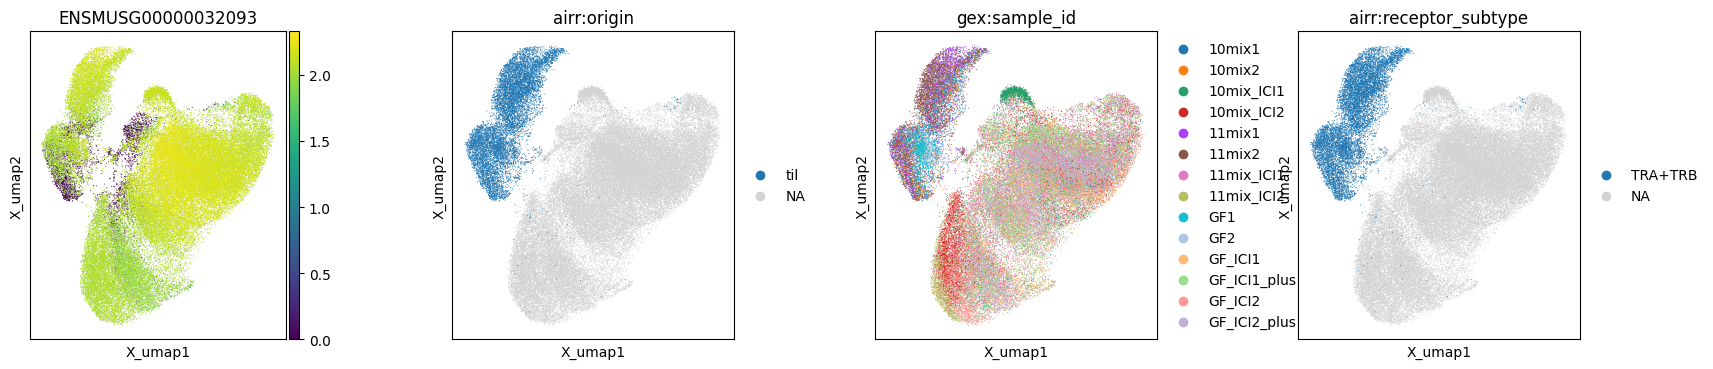

In [101]:
fig, (ax0, ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(20, 4), gridspec_kw={"wspace": 0.5})
mu.pl.embedding(mdata, basis="gex:umap", color=["ENSMUSG00000032093"], ax=ax0, show=False)
mu.pl.embedding(mdata, basis="gex:umap", color=["airr:origin"], ax=ax1, show=False)
mu.pl.embedding(mdata, basis="gex:umap", color=["gex:sample_id"], ax=ax2, show=False)
mu.pl.embedding(mdata, basis="gex:umap", color=["airr:receptor_subtype"], ax=ax3)

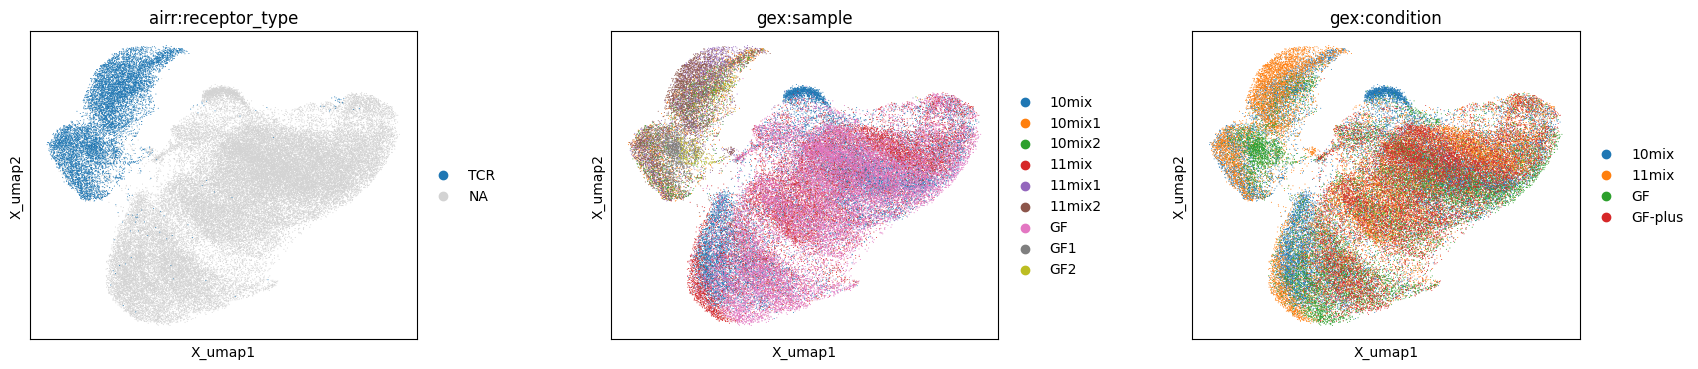

In [46]:
fig, (ax0, ax1,ax2) = plt.subplots(1, 3, figsize=(20, 4), gridspec_kw={"wspace": 0.5})
mu.pl.embedding(mdata, basis="gex:umap", color=["airr:receptor_type"], ax=ax0, show=False)
mu.pl.embedding(mdata, basis="gex:umap", color=["gex:sample"], ax=ax1, show=False)
mu.pl.embedding(mdata, basis="gex:umap", color=["gex:condition"], ax=ax2)

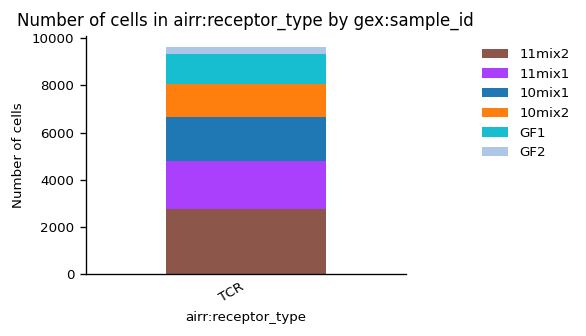

In [92]:
ir.tl.chain_qc(mdata)

_ = ir.pl.group_abundance(
   mdata, groupby="airr:receptor_type", target_col="gex:sample_id"
)


In [105]:
### TIL

In [106]:
sc.pp.log1p(mdata_til["gex"])
sc.pp.pca(mdata_til["gex"], svd_solver="arpack")
sc.pp.neighbors(mdata_til["gex"])
sc.tl.umap(mdata_til["gex"])

In [107]:
ir.pp.index_chains(mdata_til)
ir.tl.chain_qc(mdata_til)

In [108]:
# Define the conditions
colon_samples = ["10mix1", "10mix2", "11mix1", "11mix2", "GF1", "GF2"]

# Use np.where() to create the 'origin' column based on conditions
mdata_til["airr"].obs["origin"] = mdata_til["airr"].obs.index.to_series().apply(
    lambda x: "colon" if x in colon_samples else "til"
)

In [121]:
mdata_til["airr"]

AnnData object with n_obs × n_vars = 56305 × 0
    obs: 'sample', 'group', 'condition', 'receptor_type', 'receptor_subtype', 'chain_pairing', 'origin'
    uns: 'chain_indices'
    obsm: 'airr', 'chain_indices'

In [111]:
mdata_til.update()

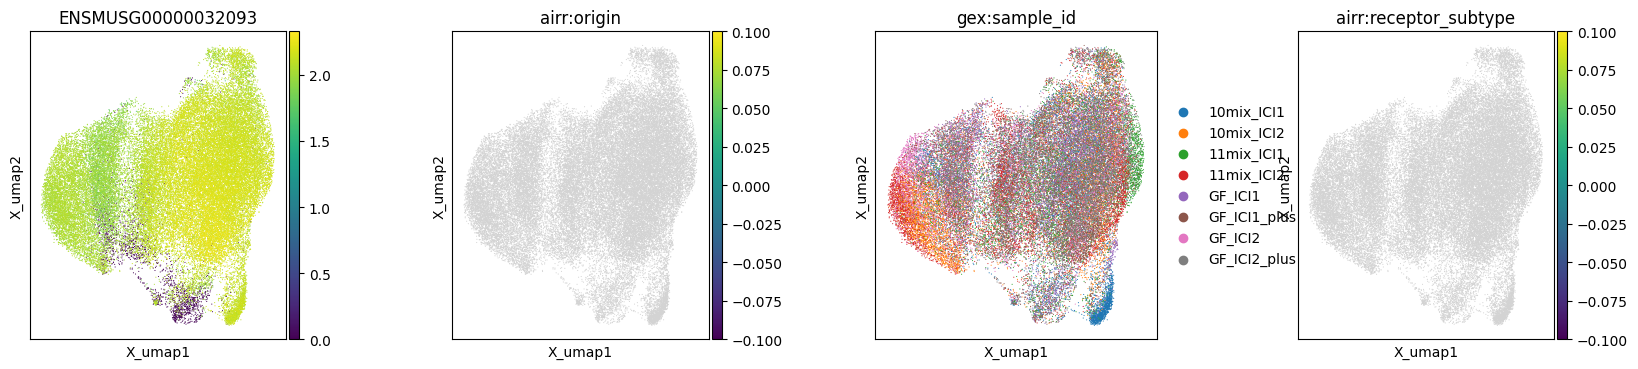

In [112]:
fig, (ax0, ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(20, 4), gridspec_kw={"wspace": 0.5})
mu.pl.embedding(mdata_til, basis="gex:umap", color=["ENSMUSG00000032093"], ax=ax0, show=False)
mu.pl.embedding(mdata_til, basis="gex:umap", color=["airr:origin"], ax=ax1, show=False)
mu.pl.embedding(mdata_til, basis="gex:umap", color=["gex:sample_id"], ax=ax2, show=False)
mu.pl.embedding(mdata_til, basis="gex:umap", color=["airr:receptor_subtype"], ax=ax3)